In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'dogbark.wav'

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

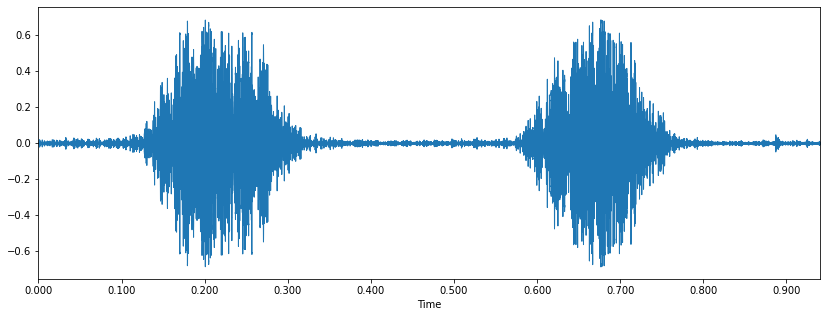

In [4]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [5]:
sample_rate

22050

In [6]:
data

array([-0.00274324, -0.00226056, -0.00111446, ...,  0.00106908,
        0.00128053,  0.00225282], dtype=float32)

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [8]:
wave_sample_rate

48000

In [9]:
wave_audio

array([-136,  -98,  -65, ...,   65,   76,   65], dtype=int16)

In [10]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [11]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Data Processing

In [12]:
import librosa
audio_file_path='100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [13]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


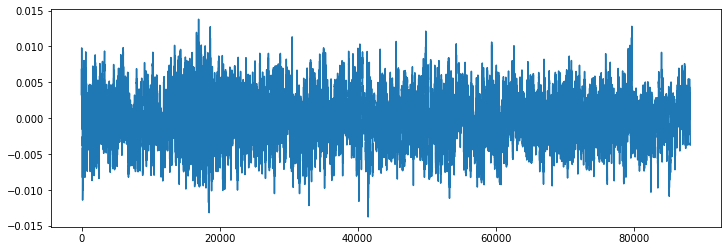

In [14]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## Observation

In [15]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [16]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

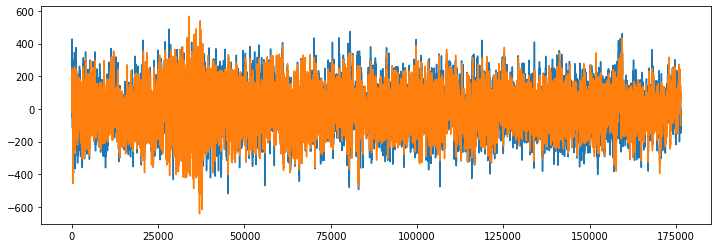

In [17]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [18]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [19]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970390e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260946e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441704e+00, -1.03232288e+01, -7.39410877e+00],
       ...,
       [-7.82766533e+00, -5.03880358e+00, -4.48165369e+00, ...,
        -1.90692186e-01,  4.34143829e+00,  1.00339069e+01],
       [-1.91763771e+00, -8.02735090e-01, -1.20930576e+00, ...,
        -1.23642266e-01,  2.90522575e-02,  9.22014713e-01],
       [-3.88130307e-01,  3.09317946e-01,  6.72155571e+00, ...,
        -2.33736610e+00, -4.25180101e+00, -2.31322813e+00]], dtype=float32)

In [20]:
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [21]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [22]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:26, 23.84it/s]C:\Users\mankm\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [05:38, 33.10it/s]C:\Users\mankm\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\mankm\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [05:54, 24.61it/s]


In [23]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


## Split the dataset into independent and dependent dataset

In [24]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(8732, 40)

In [47]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [48]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [49]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786110e+00,  2.8736601e+00],
       [-1.4074219e+01,  9.1916939e+01, -8.6787224e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936135e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777872e+00, -1.9530846e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820307e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321609e+00]], dtype=float32)

In [52]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
X_train.shape

(6985, 40)

In [54]:
X_test.shape

(1747, 40)

In [55]:
y_train.shape

(6985, 10)

In [56]:
y_test.shape

(1747, 10)

## Model Creation

In [57]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [59]:
num_labels=y.shape[1]

In [60]:
model = Sequential()

###first layer

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [62]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

## Training my model

In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9513 - accuracy: 0.6822 - val_loss: 0.7754 - val_accuracy: 0.7516

Epoch 00001: val_loss improved from inf to 0.77536, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9556 - accuracy: 0.6820 - val_loss: 0.7881 - val_accuracy: 0.7533

Epoch 00002: val_loss did not improve from 0.77536
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9475 - accuracy: 0.6876 - val_loss: 0.7929 - val_accuracy: 0.7470

Epoch 00003: val_loss did not improve from 0.77536
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9366 - accuracy: 0.6803 - val_loss: 0.7571 - val_accuracy: 0.7602

Epoch 00004: val_loss improved from 0.77536 to 0.75706, saving model to saved_models\audio_classification.hdf5
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9354 - accuracy: 0.6913 - v

219/219 [==============================] - 0s 1ms/step - loss: 0.8885 - accuracy: 0.7025 - val_loss: 0.7327 - val_accuracy: 0.7750

Epoch 00040: val_loss did not improve from 0.72305
Epoch 41/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8902 - accuracy: 0.7021 - val_loss: 0.7079 - val_accuracy: 0.7825

Epoch 00041: val_loss improved from 0.72305 to 0.70789, saving model to saved_models\audio_classification.hdf5
Epoch 42/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.7117 - val_loss: 0.7360 - val_accuracy: 0.7819

Epoch 00042: val_loss did not improve from 0.70789
Epoch 43/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9002 - accuracy: 0.7054 - val_loss: 0.7330 - val_accuracy: 0.7785

Epoch 00043: val_loss did not improve from 0.70789
Epoch 44/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8848 - accuracy: 0.7068 - val_loss: 0.7259 - val_accuracy: 0.7825

Epoch 00044: val_loss di

219/219 [==============================] - 0s 1ms/step - loss: 0.8804 - accuracy: 0.7089 - val_loss: 0.6860 - val_accuracy: 0.7853

Epoch 00080: val_loss did not improve from 0.67473
Epoch 81/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8443 - accuracy: 0.7173 - val_loss: 0.6592 - val_accuracy: 0.7905

Epoch 00081: val_loss improved from 0.67473 to 0.65923, saving model to saved_models\audio_classification.hdf5
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.7157 - val_loss: 0.6686 - val_accuracy: 0.7848

Epoch 00082: val_loss did not improve from 0.65923
Epoch 83/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.7135 - val_loss: 0.6808 - val_accuracy: 0.7871

Epoch 00083: val_loss did not improve from 0.65923
Epoch 84/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.7110 - val_loss: 0.6817 - val_accuracy: 0.7836

Epoch 00084: val_loss di

In [67]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7927876114845276


In [69]:
filename = 'dogbark.wav'
prediction_feature = features_extractor(filename)
prediction_feature.reshape(1, -1)


array([[-3.1593384e+02,  9.5675888e+01, -3.8047768e+01,  4.7500740e+01,
        -7.3586006e+00,  1.0455470e+01, -1.8447598e+00,  1.8642927e+01,
        -1.1789134e+01,  7.2919984e+00, -7.3276453e+00,  1.0661768e+01,
        -1.4730461e+01,  2.3039913e+00, -1.0813205e+01,  5.0486922e+00,
        -4.1896582e+00,  1.9373505e+01,  9.9117875e-01,  4.5830026e+00,
        -1.0203203e+01,  1.4952714e+00, -8.8648930e+00,  7.1252317e+00,
         2.8728650e+00,  1.5023614e+00, -1.3836694e+01,  3.0785373e-01,
         4.4619188e+00,  2.4852617e+00, -1.1666127e+01, -3.5005755e+00,
         4.0923734e+00,  8.7135019e+00,  1.1072224e+00,  3.0423388e+00,
         2.5794456e+00,  5.7758057e-01, -1.1463765e+01, -5.9653540e+00]],
      dtype=float32)

In [70]:
X_test[1]

array([-466.1843    ,    1.5388241 ,  -34.397354  ,   35.715332  ,
        -15.166928  ,  -18.850811  ,   -0.74158096,  -15.999888  ,
        -21.354334  ,    7.6506834 ,  -29.031446  ,  -19.142824  ,
         -2.6798902 ,   -8.466882  ,  -14.7660475 ,   -7.004777  ,
         -7.103752  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695255,  -18.795403  ,   -5.00172   ,
         -0.70152587,    2.9139898 ,   -6.710598  ,  -16.638536  ,
         -9.821647  ,   12.861958  ,    0.6552983 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.57916105,
         -1.2440342 ,   17.722294  ,   13.837573  ,   -5.164347  ],
      dtype=float32)

## Testing The Model

In [77]:
filename="noice.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)


[-68.19985     87.29134    -33.082405     7.1930194  -44.257175
   1.6156906  -21.065573     2.905285   -31.254679    -6.602655
 -15.255112    12.036592   -12.115344     8.793385    -5.8733892
   5.371607    -8.573521     7.882842    -4.01868      3.2355072
  -5.469513     5.4336104   -9.972615    -1.7398542   -8.712233
   1.6154807   -5.1911426    5.383159    -1.8851371    0.7692721
  -8.395299     1.4685358   -2.4242306    2.2206743   -3.2314806
   1.415987    -3.786343    -0.59364074  -3.4391463   -0.34909162]
[[-68.19985     87.29134    -33.082405     7.1930194  -44.257175
    1.6156906  -21.065573     2.905285   -31.254679    -6.602655
  -15.255112    12.036592   -12.115344     8.793385    -5.8733892
    5.371607    -8.573521     7.882842    -4.01868      3.2355072
   -5.469513     5.4336104   -9.972615    -1.7398542   -8.712233
    1.6154807   -5.1911426    5.383159    -1.8851371    0.7692721
   -8.395299     1.4685358   -2.4242306    2.2206743   -3.2314806
    1.415987    -3.786